In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [3]:
df.sample(5)

,Survived,Age,Fare
112,0,22.0,8.0500
298,1,NaN,30.5000
762,1,20.0,7.2292
694,0,60.0,26.5500
2,1,26.0,7.9250


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
# As we can see that the age column has so many missing value. first we have to fill these nan values 
df['Age'].fillna(df['Age'].mean(),inplace = True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Survived',axis = 1),
                                                df['Survived'],test_size = 0.2,random_state = 2)

In [8]:
x_train

,Age,Fare
30,40.000000,27.7208
10,4.000000,16.7000
873,47.000000,9.0000
182,9.000000,31.3875
876,20.000000,9.8458
...,...,...
534,30.000000,8.6625
584,29.699118,8.7125
493,71.000000,49.5042
527,29.699118,221.7792


In [9]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

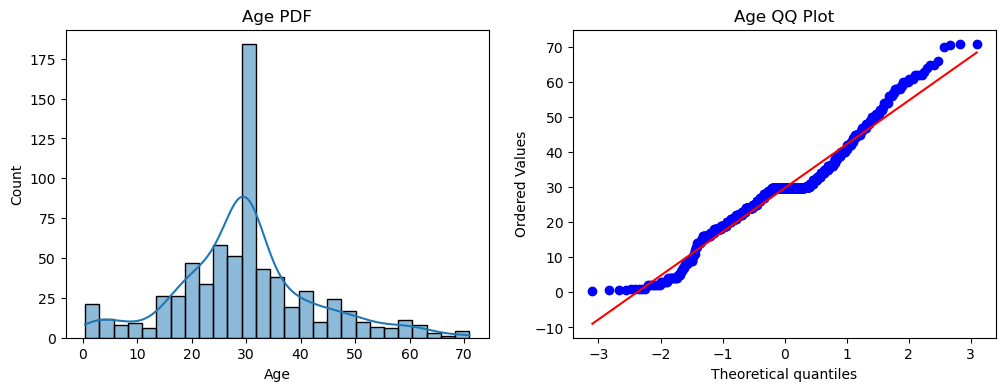

In [10]:
#  let's see some graphical representation 
import scipy.stats as stats

plt.figure(figsize=(12,4))
plt.subplot(121)
sns.histplot(x_train['Age'],kde = True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

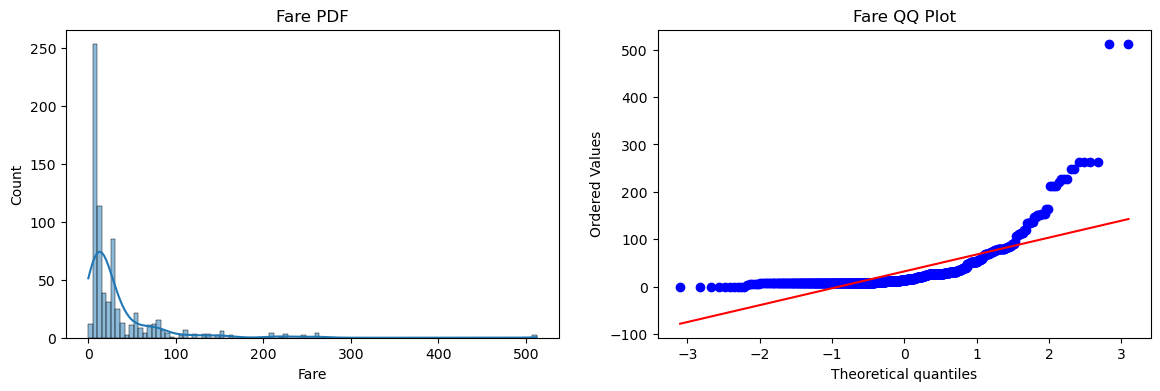

In [11]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'],kde = True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'],dist = 'norm',plot=  plt)
plt.title('Fare QQ Plot')

plt.show()

In [37]:
# first we will use normal algorithm without tranfromed and will check there accuracy score 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier()

lr.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = lr.predict(x_test)
y_pred1 = clf2.predict(x_test)

from sklearn.metrics import accuracy_score
print("Accuracy LR ",accuracy_score(y_test,y_pred))
print("Accuracy DT ",accuracy_score(y_test,y_pred1))

Accuracy LR  0.6145251396648045
Accuracy DT  0.5977653631284916


In [51]:
#  now we will use function transformed and then we will check accuracy score again
from sklearn.preprocessing import FunctionTransformer 
trf  = FunctionTransformer(func = np.log1p)

x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

lr = LogisticRegression()
clf2 = DecisionTreeClassifier()

lr.fit(x_train_transformed,y_train )
clf2.fit(x_train_transformed,y_train ) 

y_pred = lr.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("LR",accuracy_score(y_test,y_pred))
print("clf2",accuracy_score(y_test,y_pred1))

LR 0.6480446927374302
clf2 0.6033519553072626


In [50]:
x_transformed = trf.fit_transform(x         `h7)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

NameError: name 'x' is not defined